In [15]:
# uncomment to install  scikit-learn.
#!pip install scikit-learn==1.5.1

In [16]:
from tensor_module import Tensor, Device
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [ ]:

class PrimalSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None 
        self.b = None

    def fit(self, X, y, max_iter=1000, lr=0.001):
        """
        :param X: tensor of shape (n_samples, n_features)
        :param y: tensor of shape (n_samples, 1) where each entry  is either -1 or 1
        """
        #
        # FIXME: implement a reshape() method for Tensor
        #
        n_samples, n_features = tuple(X.shape)
        assert y.shape[0] == n_samples
        self.w = Tensor.from_numpy(np.zeros((n_features, 1)))
        self.b = Tensor.from_list([0.0])
        ones = Tensor.ones((n_samples, 1), Device.CPU)
        ones_t = Tensor.ones((1, n_samples), Device.CPU)
        zero = Tensor.from_list([0.0])

        for _ in range(max_iter):
            y_pred = Tensor.dot(X, self.w) + self.b # (n_samples, 1)
            psi = ones - y_pred * y                 # (n_samples, 1)
            dy = ( (-psi) < zero ) * y              # (n_samples, 1)
            assert dy.shape == [n_samples, 1]
    
            dw = Tensor.dot(ones_t, (dy * X))       # (1, n_features)
            dw = Tensor.transpose(dw)
            assert dw.shape == self.w.shape
            dw += self.w * 2.0
            dw *= lr
            self.w -= dw
    
            db = Tensor.sum(dy, start_dim=0)
            db *= (lr * -self.C)
            assert db.shape == [1,]
            self.b -= db

    def predict(self, X: Tensor):
        """
        :param X: tensor of shape (n_samples, n_features)
        :return: tensor of shape (n_samples, 1)
        """
        X = Tensor.transpose(X)
        y_pred = Tensor.dot(X, self.w) + self.b
        #
        # FIXME: it would be better for Tensor to implement > operator.
        #
        y_pred = (-y_pred) < 0.0
        y_pred *= 2 
        y_pred -= 1
        return np.array(y_pred)

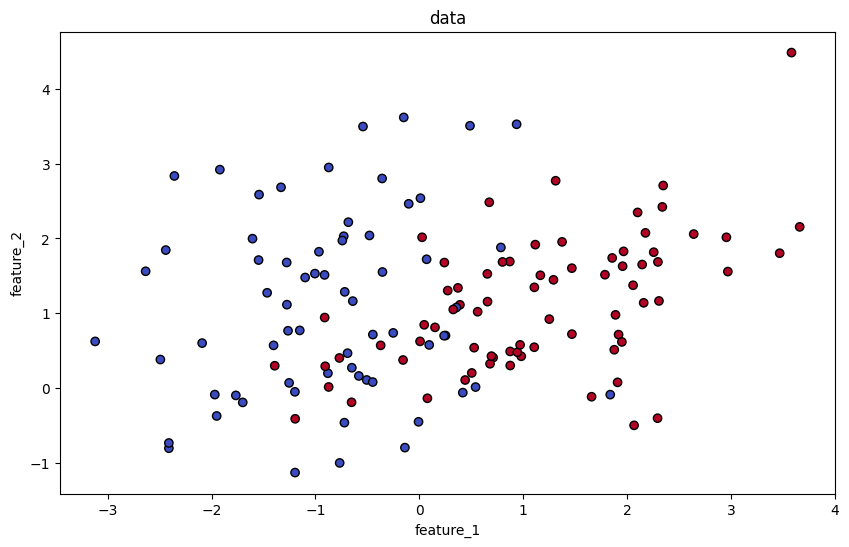

In [18]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

In [19]:
n_sample = X_train.shape[0]
X_t = Tensor.from_numpy(X_train)
y_t = Tensor.from_numpy(y_train.reshape((n_sample, 1)))
y_t *= 2.0
y_t -= 1.0
print(X_t.shape, y_t.shape)

svm = PrimalSVM()
svm.fit(X_t, y_t, max_iter=1000)

print(svm.w.to_list())
print(svm.b.to_list())

[140, 2] [140, 1]
[[-66.46916198730469], [-15.24748706817627]]
[13.262848854064941]


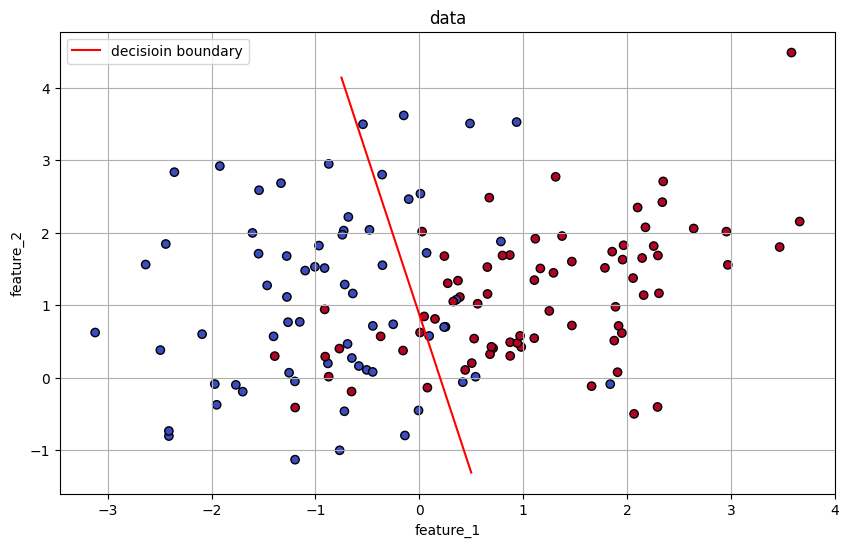

In [23]:
l = svm.w.to_list()
w1, w2 = l[0][0], l[1][0]
b = svm.b.to_list()[0]
x = np.linspace(-0.75, 0.5, 100)
y = - (w1 * x + b) / w2

plt.close()

plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.plot(x, y, color='red', label='decisioin boundary')
plt.legend()
plt.grid()

plt.show()

In [27]:
plt.close()

w = np.array([w1, w2])
b = b

y_pred  = (X_test @ w + b)
y_pred = y_pred < 0.0
acc = (np.mean(y_pred == y_test))
print(round(acc, 4))

0.85


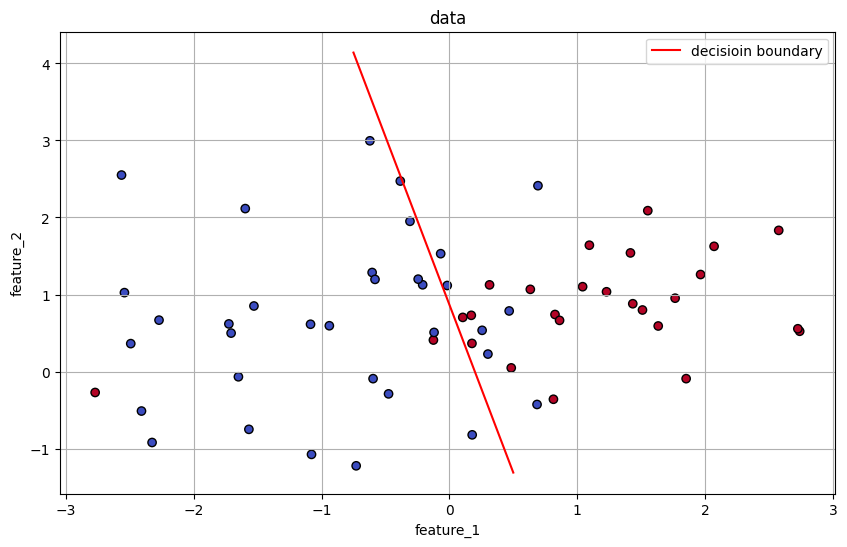

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.plot(x, y, color='red', label='decisioin boundary')
plt.legend()
plt.grid()

plt.show()
plt.close()